In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [3]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

In [4]:
df_exploded['job_skills']

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

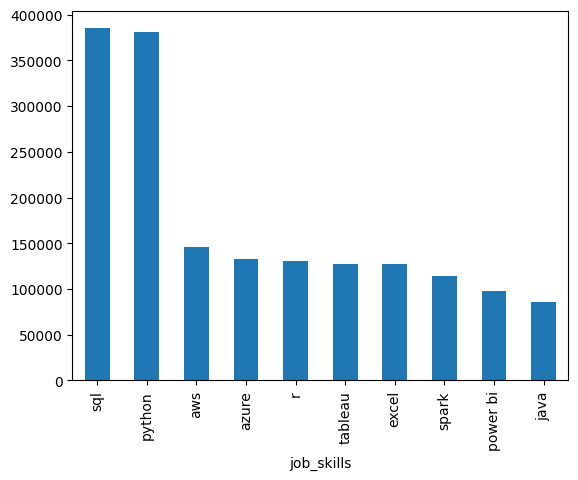

In [5]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

In [7]:
# Explode job_skills column
df_skills = df.explode('job_skills')

In [8]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [9]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [13]:
df_skills_count.sort_values(by='skill_count',  inplace=True, ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2124,visualbasic,Software Engineer,1
554,esquisse,Data Analyst,1
1728,shogun,Software Engineer,1
541,elixir,Senior Data Analyst,1


In [14]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280


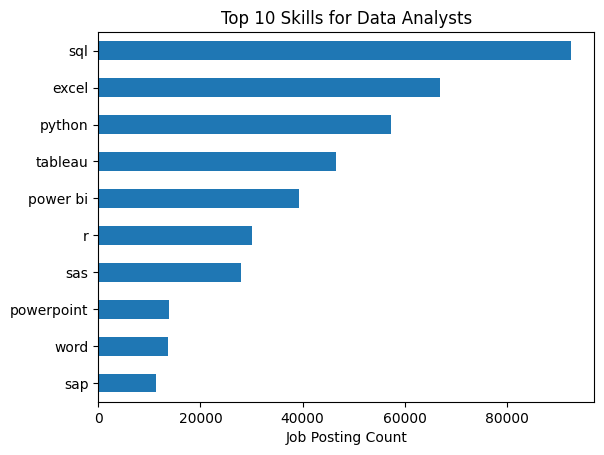

In [17]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()